In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df=df.head(3000)

In [5]:
df.shape

(3000, 11)

In [6]:
df=df.dropna()

In [7]:
df.shape

(3000, 11)

In [8]:
cut=pd.get_dummies(df['cut'],drop_first=True)

In [9]:
color=pd.get_dummies(df['color'],drop_first=True)

In [10]:
 clarity=pd.get_dummies(df['clarity'],drop_first=True)

In [11]:
df=pd.concat([df,cut,color,clarity],axis=1)

In [12]:
df=df.drop(['cut','color','Unnamed: 0','clarity'],axis=1)

In [13]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(df.drop('price',axis=1))

StandardScaler()

In [20]:
scaled_feature=scaler.transform(df.drop('price',axis=1))

In [21]:
scaled_feature

array([[-2.65501342, -0.20048033, -1.09744371, ..., -0.55167728,
        -0.24279232, -0.2708233 ],
       [-2.76056866, -1.23179938,  1.44316396, ..., -0.55167728,
        -0.24279232, -0.2708233 ],
       [-2.65501342, -2.99110833,  3.1369024 , ..., -0.55167728,
        -0.24279232, -0.2708233 ],
       ...,
       [ 0.8810872 ,  0.95217036,  0.59629473, ..., -0.55167728,
        -0.24279232, -0.2708233 ],
       [ 0.8810872 , -1.59579433, -0.25057449, ..., -0.55167728,
        -0.24279232, -0.2708233 ],
       [ 0.8810872 ,  1.19483367, -0.6740091 , ..., -0.55167728,
        -0.24279232, -0.2708233 ]])

In [22]:
features=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [23]:
features.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1
0,-2.655013,-0.200480,-1.097444,-3.108424,-3.122654,-2.982019,-0.333333,1.280955,-0.530053,-0.561951,...,-0.400116,-0.314485,-0.224544,-0.127515,-0.572218,2.171241,-0.45897,-0.551677,-0.242792,-0.270823
1,-2.760569,-1.231799,1.443164,-3.213538,-3.373187,-3.305336,-0.333333,-0.780668,1.886603,-0.561951,...,-0.400116,-0.314485,-0.224544,-0.127515,1.747585,-0.460566,-0.45897,-0.551677,-0.242792,-0.270823
2,-2.655013,-2.991108,3.136902,-2.933233,-2.961597,-3.305336,3.000000,-0.780668,-0.530053,-0.561951,...,-0.400116,-0.314485,-0.224544,-0.127515,-0.572218,-0.460566,2.17879,-0.551677,-0.242792,-0.270823
3,-2.338348,0.345512,0.172860,-2.670447,-2.675273,-2.443156,-0.333333,-0.780668,1.886603,-0.561951,...,-0.400116,3.179797,-0.224544,-0.127515,-0.572218,-0.460566,-0.45897,1.812654,-0.242792,-0.270823
4,-2.232792,0.891505,0.172860,-2.425180,-2.460530,-2.119839,3.000000,-0.780668,-0.530053,-0.561951,...,-0.400116,-0.314485,4.453463,-0.127515,-0.572218,2.171241,-0.45897,-0.551677,-0.242792,-0.270823


In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, df['price'], test_size=0.33, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error rate')

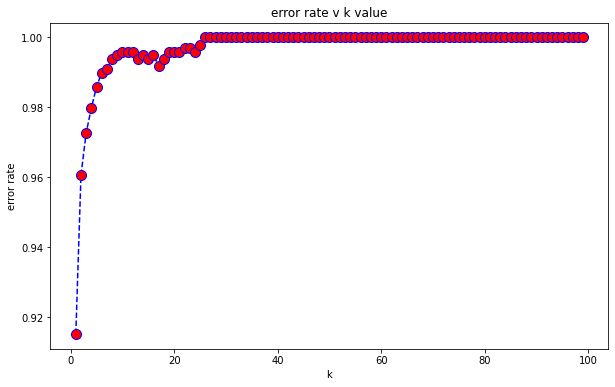

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate v k value')
plt.xlabel('k')
plt.ylabel('error rate')

In [44]:
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [46]:
correct = [1 if a- b<300 else 0 for (a, b) in zip(pred, y_test)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 93.73737373737374%
